Consider a particle with the wavefunction $\Psi(z)\propto z(z-1)^2 \ln{3z}$ in the infinite square well.

1. Expand the wavefunction in terms of the energy eigenfunctions to find the probability that the
particle is in the nth energy state (go up to the 30th energy level). Make a scatter plot of those
probabilities. From the plot, what’s the most likely enegry level?
2. Normalize the expansion above for $ N= 1, 2, 5, 10, 30$ and plot each case on the same plot
along with the analytical expression for the wavefunction.
3. Repeat the above but for a harmonic oscillator potential of your choice.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
np.set_printoptions(formatter={'float': lambda x: "{0:0.5f}"
.format(x)})

In [14]:
def tridiag(N,a,b):
    M=np.zeros([N+2,N+2])
    
    for i in range(1, N):
        M[i][i] = a
        M[i][i+1] = b
        M[i+1][i] = b
        M[N][N] = a
    
    return M
    
def eigensystem(M):
    eigenvalues,vec = np.linalg.eig(M)
    indices = np.argsort(eigenvalues)
    eigenvalues_sorted = eigenvalues[indices]
    eigenvectors_sorted = vec[:,indices]
    
    signs = np.sign(eigenvectors_sorted[1, :])
    signs[signs == 0] = 1
    vec_signed = eigenvectors_sorted * signs
    
    norms = np.sqrt(integrate.simpson(vec_signed**2, dx=1.0/vec_signed.shape[0], axis=0))
    eigenvec = vec_signed / norms
    
    return eigenvalues_sorted,eigenvec

In [16]:
N = 1000
z = np.linspace(0, 1, N+2)
dz = 1/(N+1)
fn = z[1:-1]*(z[1:-1]-1)**2*(z[1:-1]-1.25)
Int = integrate.simpson(fn**2, dx=dz)
A = Int**(-1/2)
print(f'A = {A}')

A = 11.516578833953755


In [20]:
U = np.zeros(len(z))
phi = A*fn #normalized wave function

def c_n(U, N):
    Umatrix = np.diag(U)
    d2 = -1 / dz**2 * tridiag(N, -2, 1)
    eigv, eigvec = eigensystem(d2 + Umatrix)
    
    trunc = eigv != 0
    eigv_trunc = eigv[trunc]
    eigvec_trunc = eigvec[1:-1, trunc]
    
    cn = np.zeros(N)
    for i in range(N):
        cn[i] = integrate.simpson(eigvec_trunc[:,i]*phi, dx=dz, axis=0)
        
    return cn,eigvec_trunc

In [22]:
cn,en = c_n(U,N)

In [36]:
print('k            c_k              j->k |c_j|^2\n')
for k in range(10):
    print(f'{k+1}    {cn[k]}    {sum(cn[:k+1]**2)}')

k            c_k              j->k |c_j|^2

1    -0.8600897273825683    0.7397543391490207
2    -0.4926936052934354    0.9825013278460641
3    -0.11600061154227159    0.9959574697242451
4    -0.06158662113313274    0.9997503816268412
5    -0.02651007396605989    1.0004531656485272
6    -0.01824778563171554    1.0007861473289883
7    -0.009806987509204767    1.000882324332994
8    -0.0076981685910595616    1.0009415861326505
9    -0.004642408099507387    1.0009631380856128
10    -0.003941337126254121    1.0009786722239555


### Explanation of results
The one very unexpected thing that can be observed is that the fraction of the wave function
represented by approximating the analytic wave function with eigenstates up to $k$ is greater than
$1$ for $k > 4$. Since this is a probability, it should always be in the range $[0, 1]$ so values outside this
range indicates there may be small computational errors, likely due to the numerical precision or
rounding of some of the methods used.

I also notice that the first few terms of 𝑐𝑘 dominate the sum of $|c_j|^2$, which is not necessarily
unusual, but is interesting to note since it means the approximation is is able to capture of the
behavior of the wave function with only a few eigenstates. I imagine this is due to the fact that
the initial wave function $\Psi(z, 0)$ is a simple polynomial when expanded and thus only needs a few
terms to approximate it.

In [39]:
def phi_N(N,n):
    phi_N = en[:, :n] @ cn[:n]
    Int = integrate.simpson(phi_N**2, dx=dz)
    A_N = Int**(-1/2)
    phi_norm = A_N*phi_N
    
    return phi_norm, A_N

phi_2, A_2 = phi_N(N,2)
phi_5, A_5 = phi_N(N,5)
phi_10, A_10 = phi_N(N,10)

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
/var/folders/dk/zjndy5f576z9r9smf9q_r5l40000gn/T/ipykernel_7479/1905533681.py:8: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$\phi(z,0)$')


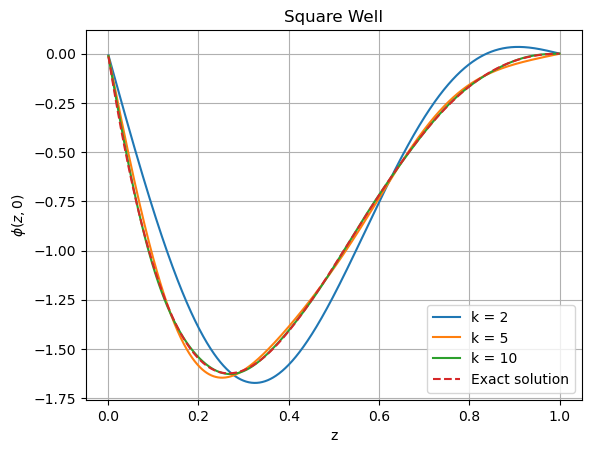

In [41]:
plt.plot(z[1:-1], phi_2,label = 'k = 2')
plt.plot(z[1:-1], phi_5,label = 'k = 5')
plt.plot(z[1:-1], phi_10,label = 'k = 10')
plt.plot(z[1:-1], phi,'--',label='Exact solution')
plt.grid()
plt.title("Square Well")
plt.xlabel('z')
plt.ylabel('$\phi(z,0)$')
plt.legend()

<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
/var/folders/dk/zjndy5f576z9r9smf9q_r5l40000gn/T/ipykernel_7479/4100703331.py:13: SyntaxWarning: invalid escape sequence '\D'
  ax[0].set_ylabel('$\Delta|\phi(z,0)|^2$')
/var/folders/dk/zjndy5f576z9r9smf9q_r5l40000gn/T/ipykernel_7479/4100703331.py:14: SyntaxWarning: invalid escape sequence '\D'
  ax[1].set_ylabel('$|\Delta|\phi(z,0)|^2|$')


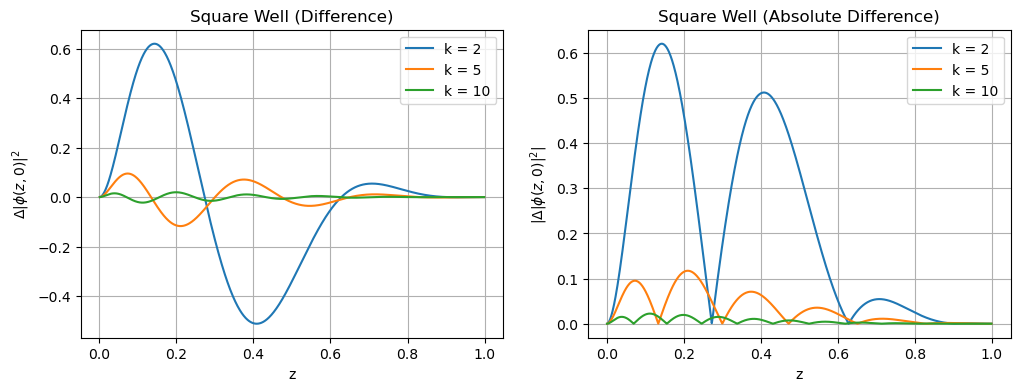

In [43]:
exact = phi**2
fig, (ax) = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(z[1:-1], phi**2-phi_2**2,label = 'k = 2')
ax[0].plot(z[1:-1], phi**2-phi_5**2,label = 'k = 5')
ax[0].plot(z[1:-1], phi**2-phi_10**2,label = 'k = 10')
ax[1].plot(z[1:-1], abs(phi**2-phi_2**2),label = 'k = 2')
ax[1].plot(z[1:-1], abs(phi**2-phi_5**2),label = 'k = 5')
ax[1].plot(z[1:-1], abs(phi**2-phi_10**2),label = 'k = 10')
ax[0].grid(); ax[1].grid()
ax[0].set_xlabel('z'); ax[1].set_xlabel('z')
ax[0].set_title("Square Well (Difference)")
ax[1].set_title("Square Well (Absolute Difference)")
ax[0].set_ylabel('$\Delta|\phi(z,0)|^2$')
ax[1].set_ylabel('$|\Delta|\phi(z,0)|^2|$')
ax[0].legend(); ax[1].legend()

In [45]:
U = np.zeros(len(z))
for i in range(1, len(U)-1):
    U[i] = (1.5/dz)*z[i]

In [47]:
cn, en = c_n(U, N)

In [49]:
print('k            c_k              j->k |c_j|^2\n')
for k in range(10):
    print(f'{k+1}    {cn[k]}    {sum(cn[:k+1]**2)}')

k            c_k              j->k |c_j|^2

1    -0.6611687117094552    0.4371440653435407
2    0.5685933622434817    0.760442476930888
3    -0.3993082396433331    0.9198895471779455
4    0.24443703705449132    0.9796390122619242
5    -0.13375724992970392    0.9975300141706814
6    0.056228418364470664    1.0006916492024513
7    -0.017135574391076366    1.0009852771121635
8    -0.0009283158811781149    1.0009861388825387
9    0.0015193380536967643    1.00098844727066
10    -0.002576934777519765    1.0009950878635077


In [51]:
phi_2, A_2 = phi_N(N,2)
phi_5, A_5 = phi_N(N,5)
phi_10, A_10 = phi_N(N,10)

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
/var/folders/dk/zjndy5f576z9r9smf9q_r5l40000gn/T/ipykernel_7479/4275175703.py:8: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$\phi(z,0)$')


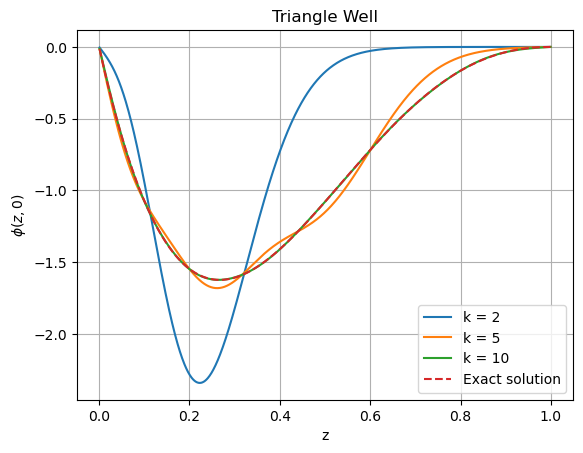

In [53]:
plt.plot(z[1:-1], phi_2,label = 'k = 2')
plt.plot(z[1:-1], phi_5,label = 'k = 5')
plt.plot(z[1:-1], phi_10,label = 'k = 10')
plt.plot(z[1:-1], phi,'--',label='Exact solution')
plt.grid()
plt.title("Triangle Well")
plt.xlabel('z')
plt.ylabel('$\phi(z,0)$')
plt.legend()

<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
/var/folders/dk/zjndy5f576z9r9smf9q_r5l40000gn/T/ipykernel_7479/1434967111.py:13: SyntaxWarning: invalid escape sequence '\D'
  ax[0].set_ylabel('$\Delta|\phi(z,0)|^2$')
/var/folders/dk/zjndy5f576z9r9smf9q_r5l40000gn/T/ipykernel_7479/1434967111.py:14: SyntaxWarning: invalid escape sequence '\D'
  ax[1].set_ylabel('$|\Delta|\phi(z,0)|^2|$')


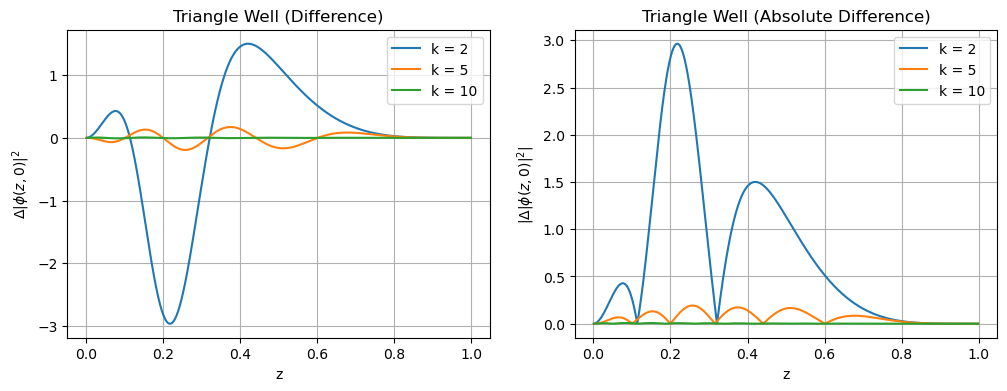

In [55]:
exact = phi**2
fig, (ax) = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(z[1:-1], phi**2-phi_2**2,label = 'k = 2')
ax[0].plot(z[1:-1], phi**2-phi_5**2,label = 'k = 5')
ax[0].plot(z[1:-1], phi**2-phi_10**2,label = 'k = 10')
ax[1].plot(z[1:-1], abs(phi**2-phi_2**2),label = 'k = 2')
ax[1].plot(z[1:-1], abs(phi**2-phi_5**2),label = 'k = 5')
ax[1].plot(z[1:-1], abs(phi**2-phi_10**2),label = 'k = 10')
ax[0].grid(); ax[1].grid()
ax[0].set_xlabel('z'); ax[1].set_xlabel('z')
ax[0].set_title("Triangle Well (Difference)")
ax[1].set_title("Triangle Well (Absolute Difference)")
ax[0].set_ylabel('$\Delta|\phi(z,0)|^2$')
ax[1].set_ylabel('$|\Delta|\phi(z,0)|^2|$')
ax[0].legend(); ax[1].legend()